# Multiclass Classification using Keras and TensorFlow 2.0 on Food-101 Dataset
![alt text](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

### Overview
* **Install TensorFlow 2.0 Preview**
* **Download and extract Food 101 dataset**
* **Understand dataset structure and files** 
* **Visualize random image from each of the 101 classes**
* **Split the image data into train and test using train.txt and test.txt**
* **Create a subset of data with few classes(3) - train_mini and test_mini for experimenting**
* **Fine tune Inception Pretrained model using Food 101 dataset**
* **Visualize accuracy and loss plots**
* **Predicting classes for new images from internet**
* **Scale up and fine tune Inceptionv3 model with 11 classes of data**
* **Summary of the things I tried**
* **Further improvements**
* **Feedback**

### Install TensorFlow 2.0 Preview

* **TensorFlow 2.0 preview is available to test**
* **Colab is the easiest way to try it**
* **We can install TensorFlow 2.0 Preview using the below code cell,**

In [0]:
!pip install tf-nightly-gpu-2.0-preview

    100% |████████████████████████████████| 328.7MB 75kB/s 
    100% |████████████████████████████████| 358kB 12.0MB/s 
    100% |████████████████████████████████| 61kB 28.6MB/s 
    100% |████████████████████████████████| 3.2MB 9.1MB/s 


* **Upgrading to TF 2.0 will be a critical process if you already have projects/code in other TF versions**
* **tf_upgrade_v2 tool helps in converting existing TF code to TF 2.0**
* **This tool is automatically installed by pip install for TensorFlow 1.13 and later**
* **Below is an example of how to use this tool**

In [0]:
# Download the Python script below and run tf_upgrade tool
!wget https://raw.githubusercontent.com/theimgclist/PracticeGround/master/TensorFlow2.0/Food101.py

--2019-02-17 16:45:40--  https://github.com/theimgclist/PracticeGround/blob/master/TensorFlow2.0/Food101.py
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Food101.py’

Food101.py              [ <=>                ]  73.46K  --.-KB/s    in 0.05s   

2019-02-17 16:45:40 (1.46 MB/s) - ‘Food101.py’ saved [75223]



In [0]:
# Run the upgrade tool on the downloaded file
!tf_upgrade_v2 --infile Food101.py --outfile food101-upgraded.py

TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 1 files
Detected 0 issues that require attention
--------------------------------------------------------------------------------


Make sure to read the detailed log 'report.txt'



* **The upgrade tool ran successfully and it didnt find any issues when converting the code**
* **The output file is food101-upgraded.py which contains the code in TF 2.0**
* **It also generates a report file which contains the logs**

### Download and extract Food 101 Dataset

In [0]:
# Check if GPU is enabled
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.0.0-dev20190217
/device:GPU:0


In [0]:
# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

* **Grab a coffee, this is going to take some time..**

In [0]:
# Download data and extract it to folder
get_data_extract()

Dataset already exists


### Understand dataset structure and files 

**The dataset being used is [Food 101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/)**
* **This dataset has 101000 images in total. It's a food dataset with 101 categories(multiclass)**
* **Each type of food has 750 training samples and 250 test samples**
* **Note found on the webpage of the dataset :  **  
***On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.***  
* **The entire dataset is 5GB in size**

In [0]:
# Check the extracted dataset folder
!ls food-101/

images		       meta	   test       train
license_agreement.txt  README.txt  test_mini  train_mini


**images** folder contains 101 folders with 1000 images  each  
Each folder contains images of a specific food class

In [0]:
import os
os.listdir('food-101/images')

['garlic_bread',
 'breakfast_burrito',
 'paella',
 'churros',
 'spaghetti_carbonara',
 'clam_chowder',
 'steak',
 'guacamole',
 'beignets',
 'deviled_eggs',
 'cheesecake',
 'crab_cakes',
 'grilled_salmon',
 'fried_calamari',
 'caesar_salad',
 'scallops',
 'macarons',
 'pizza',
 'mussels',
 'miso_soup',
 'takoyaki',
 'samosa',
 'pho',
 'poutine',
 'macaroni_and_cheese',
 'frozen_yogurt',
 'caprese_salad',
 'chicken_wings',
 'sashimi',
 'ramen',
 'sushi',
 'shrimp_and_grits',
 'lobster_bisque',
 'baby_back_ribs',
 'gyoza',
 'spring_rolls',
 'filet_mignon',
 'peking_duck',
 'seaweed_salad',
 'beef_carpaccio',
 'beet_salad',
 'foie_gras',
 'onion_rings',
 'beef_tartare',
 'ceviche',
 'creme_brulee',
 'edamame',
 'chocolate_cake',
 'apple_pie',
 'tiramisu',
 'ravioli',
 'chicken_quesadilla',
 'lasagna',
 'hot_dog',
 'chocolate_mousse',
 'french_toast',
 'grilled_cheese_sandwich',
 'hot_and_sour_soup',
 'cheese_plate',
 'french_fries',
 'french_onion_soup',
 'carrot_cake',
 'hummus',
 'chick

**meta** folder contains the text files - train.txt and test.txt  
**train.txt** contains the list of images that belong to training set  
**test.txt** contains the list of images that belong to test set  
**classes.txt** contains the list of all classes of food

In [0]:
os.listdir('food-101/meta')

['classes.txt',
 'labels.txt',
 'train.txt',
 'test.txt',
 'test.json',
 'train.json']

In [0]:
!head food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [0]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


### Visualize random image from each of the 101 classes

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

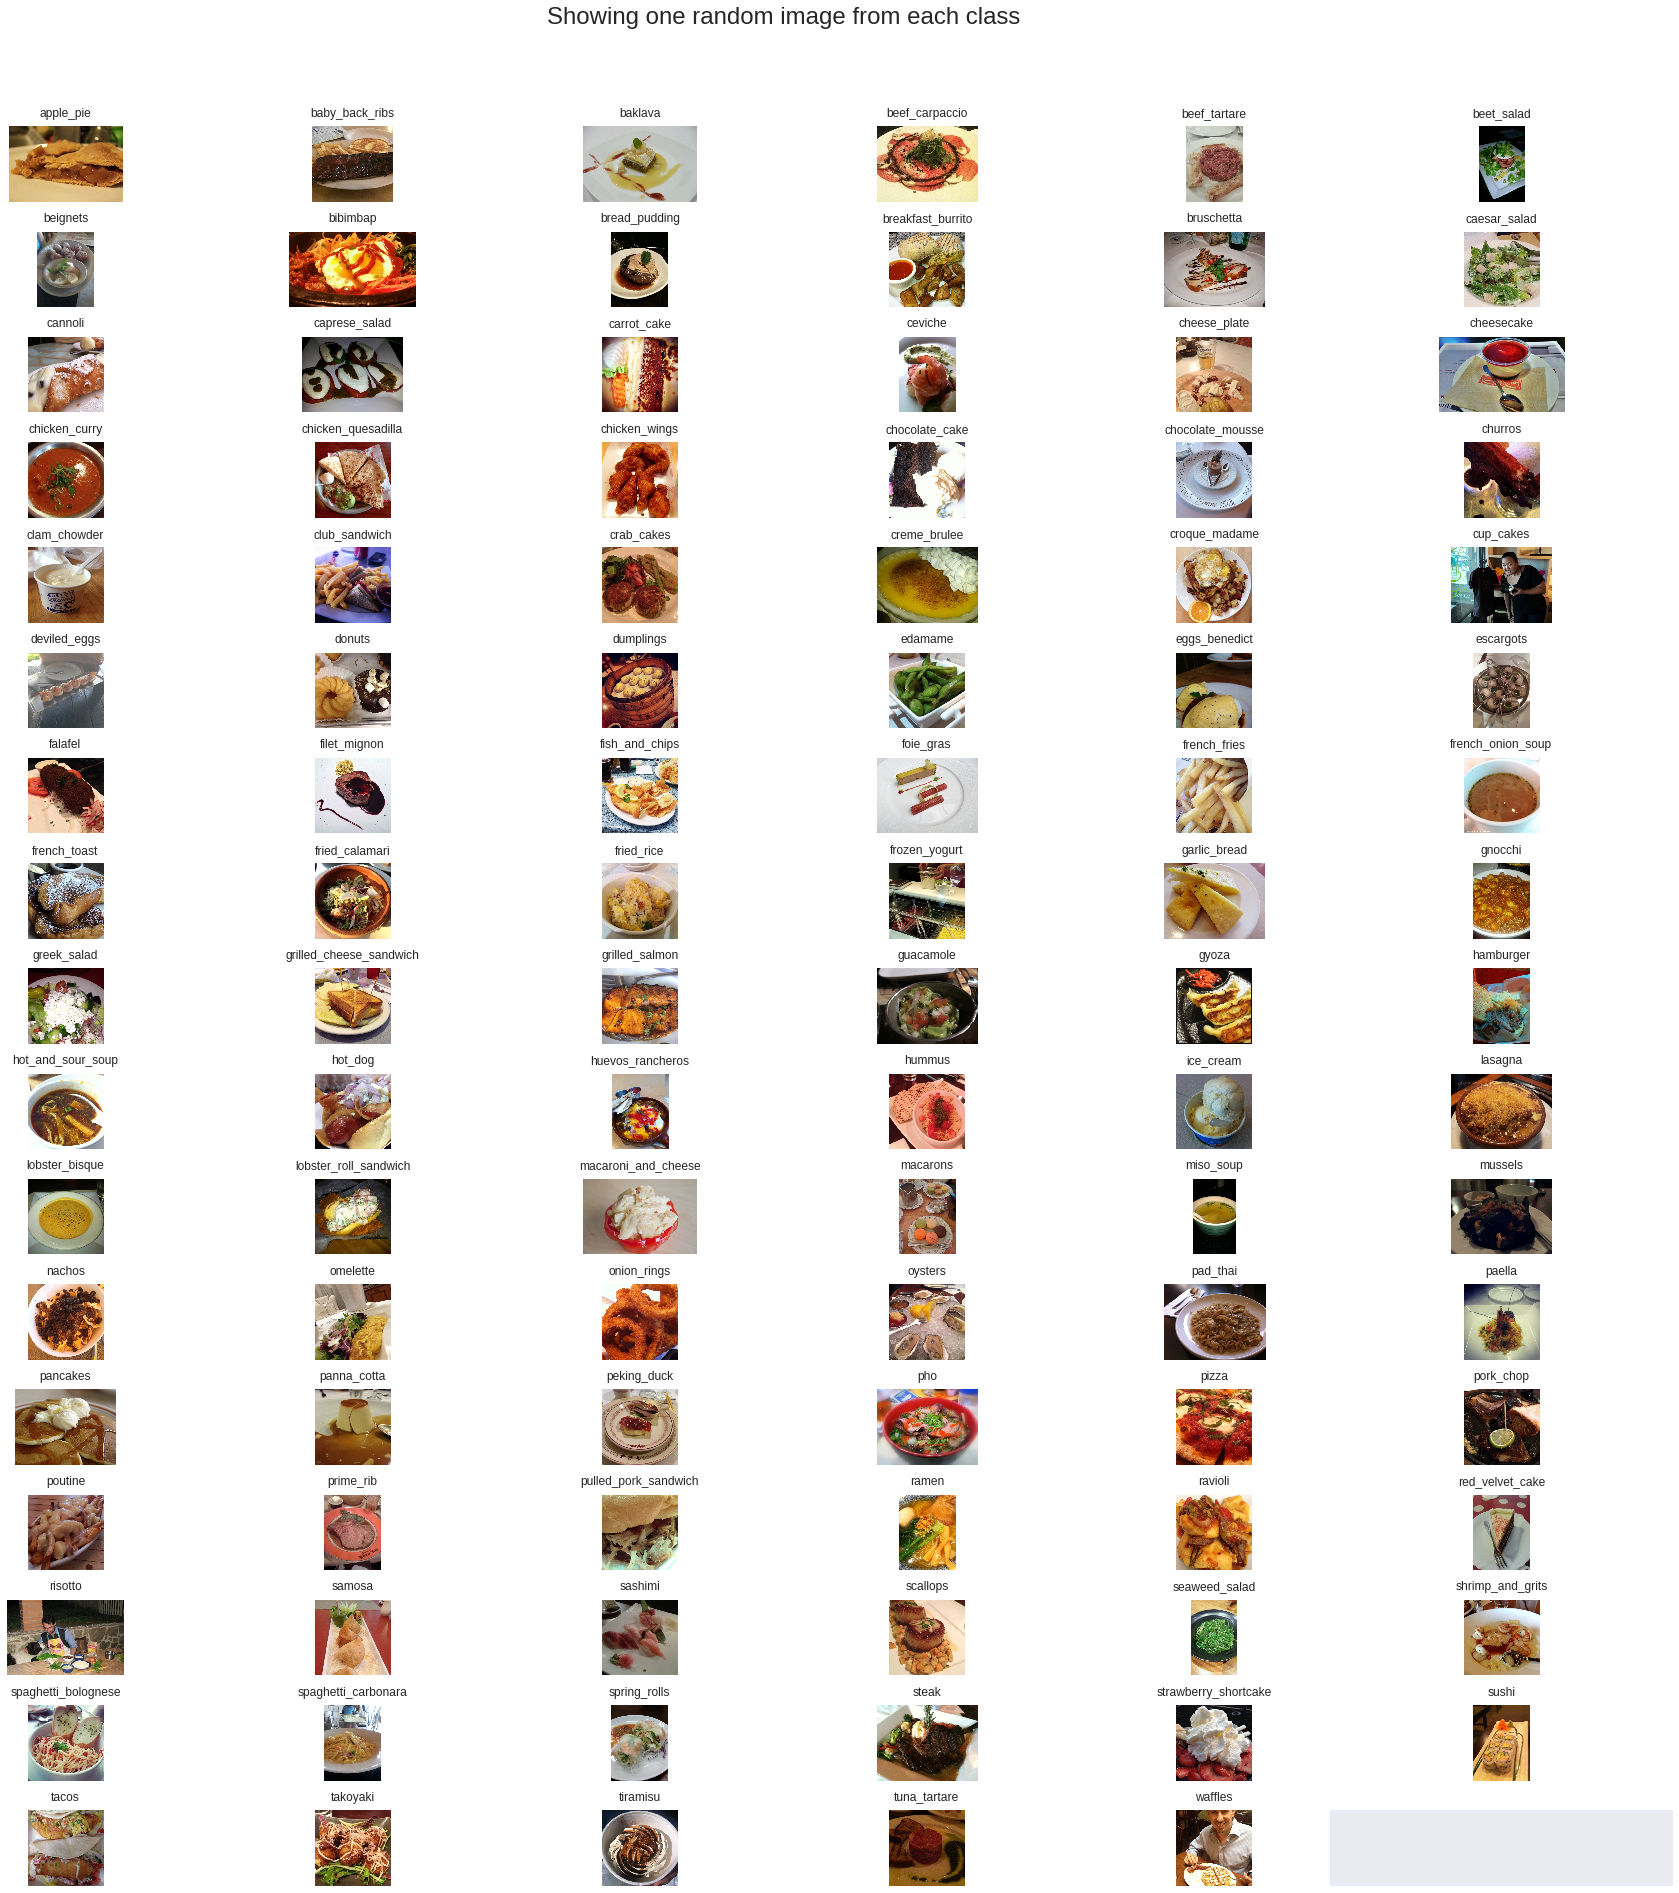

In [0]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### Split the image data into train and test using train.txt and test.txt

In [0]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [0]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [0]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [0]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [0]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


### Create a subset of data with few classes(3) - train_mini and test_mini for experimenting

* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [0]:
# List of all 101 types of foods(sorted alphabetically)
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [0]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [0]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','omelette']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [0]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [0]:
print("Total number of samples in train folder")

!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2250


In [0]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [0]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
750


### Fine tune Inception Pretrained model using Food 101 dataset

* Keras and other Deep Learning libraries provide pretrained models  
* These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet  
* Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data  
* This helps in faster convergance and saves time and computation when compared to models trained from scratch

* We currently have a subset of dataset with 3 classes - samosa, pizza and omelette  
* Use the below code to finetune Inceptionv3 pretrained model

In [0]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np



K.clear_session()

n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/10
139/140============================>.] - ETA: 1s - loss: 1.0508 - acc: 0.4946
Epoch 00001: val_loss improved from inf to 0.80469, saving model to best_model_3class.hdf5
140/140==============================] - 169s 1s/step - loss: 1.0496 - acc: 0.4951 - val_loss: 0.8047 - val_acc: 0.7717
Epoch 2/10
139/140============================>.] - ETA: 0s - loss: 0.7951 - acc: 0.6970
Epoch 00002: val_loss improved from 0.80469 to 0.60840, saving model to best_model_3class.hdf5
140/140==============================] - 96s 686ms/step - loss: 0.7931 - acc: 0.6987 - val_loss: 0.6084 - val_acc: 0.8424
Epoch 3/10
139/140============================>.] - ETA: 0s - loss: 0.6393 - acc: 0.7777
Epoch 00003: val_loss improved from 0.60840 to 0.47935, saving model to best_model_3class.hdf5
140/140==============================] - 95s 680ms/step - loss: 0.6389 - acc: 0.7780 - val_loss: 0.4794 - val_acc: 0.8628
Epoch

### Visualize the accuracy and loss plots

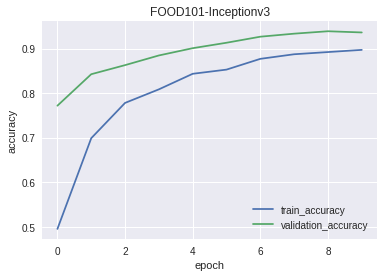

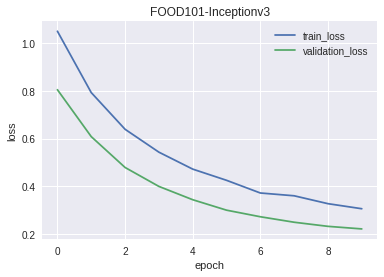

In [0]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* **The best model saved has a Top-1 validation accuracy of 93%**
 


### Predicting classes for new images from internet using the best trained model

In [0]:
%%time
# Loading the best saved model to make predictions

import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

CPU times: user 7.43 s, sys: 182 ms, total: 7.61 s
Wall time: 7.48 s


* **Setting compile=False and clearing the session leads to faster loading of the saved model**
* **Withouth the above addiitons, model loading was taking more than a minute!**

In [0]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [0]:
# Downloading images from internet using the URLs
!wget -O samosa.jpg http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
!wget -O pizza.jpg http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
!wget -O omelette.jpg https://www.incredibleegg.org/wp-content/uploads/basic-french-omelet-930x550.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files

# from google.colab import files
# image = files.upload()

--2019-02-17 18:06:20--  http://veggiefoodrecipes.com/wp-content/uploads/2016/05/lentil-samosa-recipe-01.jpg
Resolving veggiefoodrecipes.com (veggiefoodrecipes.com)... 62.75.168.50
Connecting to veggiefoodrecipes.com (veggiefoodrecipes.com)|62.75.168.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75560 (74K) [image/jpeg]
Saving to: ‘samosa.jpg’

samosa.jpg          100%[===================>]  73.79K   196KB/s    in 0.4s    

2019-02-17 18:06:21 (196 KB/s) - ‘samosa.jpg’ saved [75560/75560]

--2019-02-17 18:06:22--  http://104.130.3.186/assets/itemimages/400/400/3/default_9b4106b8f65359684b3836096b4524c8_pizza%20dreamstimesmall_94940296.jpg
Connecting to 104.130.3.186:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40462 (40K) [image/jpeg]
Saving to: ‘pizza.jpg’

pizza.jpg           100%[===================>]  39.51K  --.-KB/s    in 0.03s   

2019-02-17 18:06:23 (1.52 MB/s) - ‘pizza.jpg’ saved [40462/40462]

--2019-02-17 18:06:24--  h

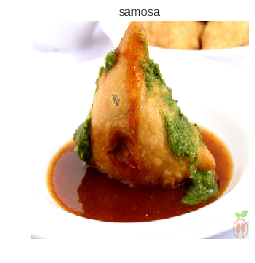

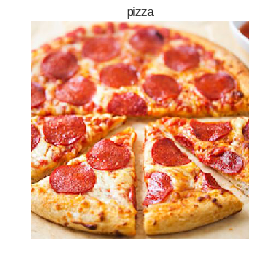

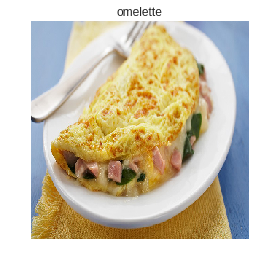

In [0]:
# Make a list of downloaded images and test the trained model
images = []
images.append('samosa.jpg')
images.append('pizza.jpg')
images.append('omelette.jpg')
predict_class(model_best, images, True)

* **Yes!!! The model got them all right!!**

### Fine tune Inceptionv3 model with 11 classes of data

* **We trained a model on 3 classes and tested it using new data**
* ** The model was able to predict the classes of all three test images correctly**
* **Will it be able to perform at the same level of accuracy for more classes?**
* **FOOD-101 dataset has 101 classes of data**
* ** Even with fine tuning using a pre-trained model, each epoch was taking more than an hour when all 101 classes of data is used(tried this on both Colab and on a Deep Learning VM instance with P100 GPU on GCP)**
* **But to check how the model performs when more classes are included, I'm using the same model to fine tune and train on 11 randomly chosen classes**


In [0]:
# Helper function to select n random food classes
import random
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  print("These are the randomly picked food classes we will be training the model on...\n", food_list)
  return food_list
  

In [0]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 11
food_list = pick_n_random_classes(11)

These are the randomly picked food classes we will be training the model on...
 ['apple_pie', 'carrot_cake', 'chocolate_cake', 'clam_chowder', 'crab_cakes', 'croque_madame', 'french_fries', 'macaroni_and_cheese', 'tacos', 'tiramisu', 'waffles']


In [0]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into apple_pie
Copying images into carrot_cake
Copying images into chocolate_cake
Copying images into clam_chowder
Copying images into crab_cakes
Copying images into croque_madame
Copying images into french_fries
Copying images into macaroni_and_cheese
Copying images into tacos
Copying images into tiramisu
Copying images into waffles


In [0]:
print("Total number of samples in train folder")
!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
8250


In [0]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into carrot_cake
Copying images into chocolate_cake
Copying images into clam_chowder
Copying images into crab_cakes
Copying images into croque_madame
Copying images into french_fries
Copying images into macaroni_and_cheese
Copying images into tacos
Copying images into tiramisu
Copying images into waffles


In [0]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2750


In [0]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 8250 #75750
nb_validation_samples = 2750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_11class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_11class.hdf5')


Found 8250 images belonging to 11 classes.
Found 2750 images belonging to 11 classes.
Epoch 1/10
514/515============================>.] - ETA: 0s - loss: 2.1653 - acc: 0.3193
Epoch 00001: val_loss improved from inf to 1.58121, saving model to best_model_11class.hdf5
515/515==============================] - 419s 813ms/step - loss: 2.1648 - acc: 0.3193 - val_loss: 1.5812 - val_acc: 0.6177
Epoch 2/10
514/515============================>.] - ETA: 0s - loss: 1.4690 - acc: 0.5916
Epoch 00002: val_loss improved from 1.58121 to 0.99604, saving model to best_model_11class.hdf5
515/515==============================] - 347s 674ms/step - loss: 1.4694 - acc: 0.5916 - val_loss: 0.9960 - val_acc: 0.7657
Epoch 3/10
514/515============================>.] - ETA: 0s - loss: 1.1073 - acc: 0.6981
Epoch 00003: val_loss improved from 0.99604 to 0.72963, saving model to best_model_11class.hdf5
515/515==============================] - 347s 673ms/step - loss: 1.1065 - acc: 0.6982 - val_loss: 0.7296 - val_acc: 0

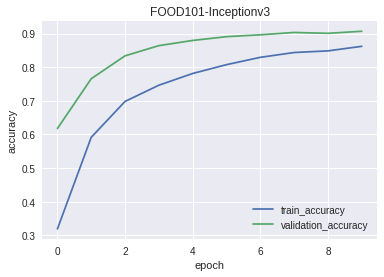

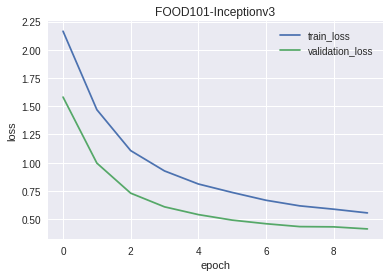

In [0]:
plot_accuracy(history_11class,'FOOD101-Inceptionv3')
plot_loss(history_11class,'FOOD101-Inceptionv3')

* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* **I set number of epochs to just 10, as each epoch's taking around 6mins**
* **loss is still decreasing, so the model can have some more epochs**
* **Increase the number of epochs for better accuracy**
 


In [0]:
%%time
# Loading the best saved model to make predictions

from tensorflow.keras.models import load_model
K.clear_session()
model_best = load_model('best_model_11class.hdf5',compile = False)

CPU times: user 7.35 s, sys: 181 ms, total: 7.54 s
Wall time: 7.43 s


In [0]:
# Downloading images from internet using the URLs
!wget -O frenchfries.jpg https://www.dirtyapronrecipes.com/wp-content/uploads/2017/03/french-fries.jpg
!wget -O chocolatecake.jpg https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13.jpg
!wget -O waffles.jpg https://upload.wikimedia.org/wikipedia/commons/5/5b/Waffles_with_Strawberries.jpg
!wget -O applepie.jpg https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files


# from google.colab import files
# image = files.upload()

--2019-02-17 19:25:19--  https://www.dirtyapronrecipes.com/wp-content/uploads/2017/03/french-fries.jpg
Resolving www.dirtyapronrecipes.com (www.dirtyapronrecipes.com)... 69.89.31.107
Connecting to www.dirtyapronrecipes.com (www.dirtyapronrecipes.com)|69.89.31.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94134 (92K) [image/jpeg]
Saving to: ‘frenchfries.jpg’

frenchfries.jpg     100%[===================>]  91.93K  --.-KB/s    in 0.04s   

2019-02-17 19:25:20 (2.46 MB/s) - ‘frenchfries.jpg’ saved [94134/94134]

--2019-02-17 19:25:21--  https://tastesbetterfromscratch.com/wp-content/uploads/2010/06/Hersheys-Perfectly-Chocolate-Chocolate-Cake-13.jpg
Resolving tastesbetterfromscratch.com (tastesbetterfromscratch.com)... 192.124.249.69
Connecting to tastesbetterfromscratch.com (tastesbetterfromscratch.com)|192.124.249.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46367 (45K) [image/jpeg]
Saving to: ‘chocolatecake.jpg’

chocolatec

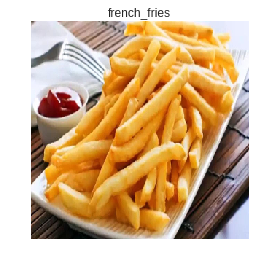

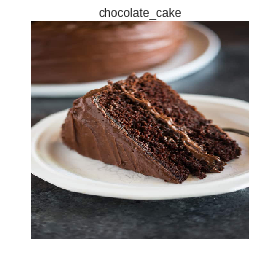

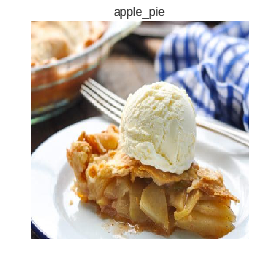

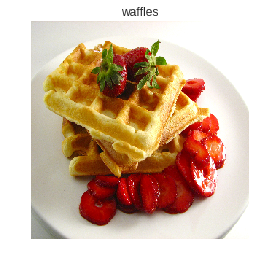

In [0]:
# Make a list of downloaded images and test the trained model
images = []
images.append('frenchfries.jpg')
images.append('chocolatecake.jpg')
images.append('applepie.jpg')
images.append('waffles.jpg')
predict_class(model_best, images, True)

* **The model did well even when the number of classes are increased to 11**
* **Model training on all 101 classes takes some time**
* **It was taking more than an hour for one epoch when the full dataset is used for fine tuning**

### Summary of the things I tried
* **This notebook is the refactored and organised version of all the experiments and training trials I made**
* **I used this very useful Keras blog - https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html for reference**
* **I spent considerable amount of time in fixing things even before getting to the model training phase**
* **For example, it took some time to get the image visualization plots aligned withouth any overlap**
* **It is easier to go through a notebook and understand code someone else has taken hours to finish**
* **I started with VGG16 pretrained model. It did give good validation accuracy after training for few epochs**
* **I then tried Inceptionv3. VGG was taking more time for each epoch and since inception was also giving good validation accuracy, I chose Inception over VGG**
* **I ran both VGG and Inception with two different image sizes - 150 X  50 and 299 X 299**
* **I had better results with larger image size and hence chose 299 X 299**
* **For data augmentation, I sticked to the transformations used in the above blog**
* **I didnt use TTA except rescaling test images**
* **To avoid Colab connection issues during training, I set number of epochs to 10**
* **As the loss is still decreasing after 10 epochs both with 3-class and 11-class subset of data, the model can be trained for some more epochs for better accuracy**


### Further Improvements
* **Try more augmentation on test images**
* **Fine tune the model on the entire dataset(for a few epochs atleast)**
* **Play with hyper parameters, their values and see how it impacts model performance**
* **There is currently no implementation to handle out of distribution / no class scenario. Can try below methods:**
    * Set a threshold for the class with highest score. When model gives prediction score below the threshold for its top prediction, the prediction can be classified as NO-CLASS / UNSEEN
    * Add a new class called **NO-CLASS**, provide data from different classes other than those in the original dataset. This way the model also learns how to classify totally unseen/unrelated data
    * I am yet to try these methods and not sure about the results
* **Recently published paper - [Rethinking ImageNet Pretraining](https://arxiv.org/abs/1811.08883 ), claims that training from random initialization instead of using pretrained weights is not only robust but also gives comparable results**
* **Pre-trained models are surely helpful. They save a lot of time and computation. Yet, that shouldn't be the reason to not try to train a model from scratch**
* **Time taking yet productive experiment would be to try and train a model on this dataset from scratch**

### Feedback

* **Did you find any issues with the above code or have any suggestions or corrections?**
* **There must be many ways to improve the model, its architecture, hyperparameters..**
* **Please do let me know!**
* **[Avinash Kappa](https://theimgclist.github.io/)**
* **[Twitter](https://twitter.com/avinashso13)**
* **[Linkedin](https://www.linkedin.com/in/avinash-kappa)**